In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [11]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [12]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [13]:
# 筛选出药物是Oxaliplatin
df_smiles_oxaliplatin = df_smiles[df_smiles['DRUG_NAME'] == 'Oxaliplatin']
df_smiles_oxaliplatin.head()

,CID,SMILES,DRUG_NAME
38,9887053,C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2],Oxaliplatin


In [14]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
df_smiles_att.head()

,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,5-Fluorouracil,PCM,OPM2,0.002356,0.003071,0.002732,0.004914,0.004261,0.004978,0.001775,...,0.026119,0.028015,0.010345,0.021115,0.011152,0.008832,0.005626,0.006518,0.009014,0.005490
1,5-azacytidine,PCM,OPM2,0.002204,0.002897,0.002576,0.004770,0.004089,0.004820,0.001639,...,0.017020,0.008060,0.010243,0.006067,0.029940,0.015759,0.011790,0.008960,0.005428,0.005950
2,A-366,PCM,OPM2,0.002104,0.002775,0.002463,0.004676,0.003960,0.004714,0.001537,...,0.006011,0.005778,0.009135,0.004954,0.008338,0.016123,0.018105,0.010478,0.005555,0.005962
3,ABT737,PCM,OPM2,0.001874,0.002511,0.002220,0.004436,0.003700,0.004466,0.001332,...,0.005321,0.005187,0.006720,0.006663,0.007908,0.006287,0.005171,0.004562,0.009057,0.006331
4,AGI-5198,PCM,OPM2,0.001997,0.002653,0.002349,0.004567,0.003842,0.004599,0.001443,...,0.008812,0.008993,0.008153,0.015015,0.015713,0.017204,0.017644,0.010247,0.005821,0.006480


In [15]:
# 筛选出药物是Oxaliplatin
df_smiles_att_oxaliplatin = df_smiles_att[df_smiles_att['drug'] == 'Oxaliplatin']
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_smiles_att_oxaliplatin = df_smiles_att_oxaliplatin[df_smiles_att_oxaliplatin['cell_line'].isin(cell_line)]
print(df_smiles_att_oxaliplatin.shape)
df_smiles_att_oxaliplatin.head()

(13, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
9630,Oxaliplatin,LUAD,HCC827,0.002150,0.002838,0.002501,0.004781,0.004034,0.004764,0.001601,...,0.021231,0.018706,0.019403,0.019069,0.023888,0.010702,0.008606,0.006544,0.010231,0.008873
9855,Oxaliplatin,LUAD,PC14,0.002166,0.002850,0.002527,0.004772,0.004051,0.004772,0.001609,...,0.005565,0.007648,0.007628,0.011923,0.005747,0.005934,0.009659,0.005333,0.009377,0.007399
10079,Oxaliplatin,LUSC,RERFLCSQ1,0.002168,0.002844,0.002506,0.004826,0.004044,0.004769,0.001603,...,0.019794,0.020026,0.022478,0.019093,0.014669,0.008793,0.017647,0.007449,0.011448,0.008308
10296,Oxaliplatin,LUAD,NCIH2228,0.002160,0.002833,0.002529,0.004807,0.004038,0.004752,0.001599,...,0.005141,0.007362,0.005506,0.011072,0.005252,0.006833,0.008842,0.006372,0.009486,0.005294
10512,Oxaliplatin,LUSC,NCIH2170,0.002174,0.002864,0.002524,0.004770,0.004055,0.004789,0.001618,...,0.020514,0.020832,0.023145,0.019536,0.015008,0.008693,0.018030,0.007406,0.011752,0.008231


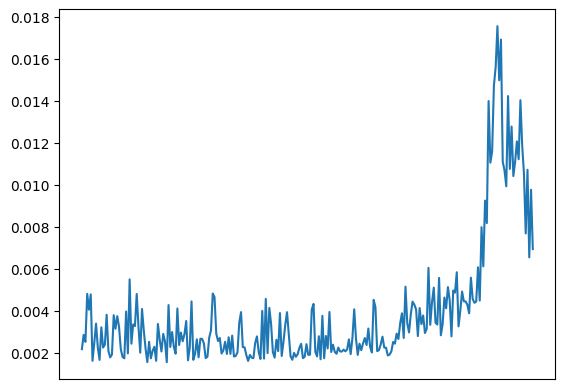

In [16]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_oxaliplatin_mean = df_smiles_att_oxaliplatin.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_oxaliplatin_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [17]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [29]:
Oxaliplatin = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == 'Oxaliplatin']['SMILES'].values[0])
Oxaliplatin_array = np.array(Oxaliplatin)
type(Oxaliplatin_array)

numpy.ndarray

In [30]:
# 根据dict将Oxaliplatin从数字替换成字符
Oxaliplatin = [list(dict.keys())[list(dict.values()).index(i)] for i in Oxaliplatin]
# 将Oxaliplatin转换成ndarray
Oxaliplatin = np.array(Oxaliplatin)
type(Oxaliplatin)

numpy.ndarray

In [ ]:
#Oxaliplatin